# Some simple sanity checks

1. Quick check that valid-tie date cutoffs work with FRED series
2. Plot a couple of FX series:
 * The CHF/EUR unpeg
 * Brexit

In [1]:
import mand.core

from mand.core import Entity, node, Context, _tr, ObjectDb, _DBO, EncDec
from mand.core import displayDict, displayListOfDicts
from mand.core import Monitor, PrintMonitor, SummaryMonitor
from mand.lib.extrefdata import ExternalRefData, dataField

from mand.user.refdata.FRED import FredManager, FredSeries, FredCategory, FredClock, FredTimestamp

import datetime

db = ObjectDb(name='production-1', inMem=False, ro=True)

%matplotlib inline


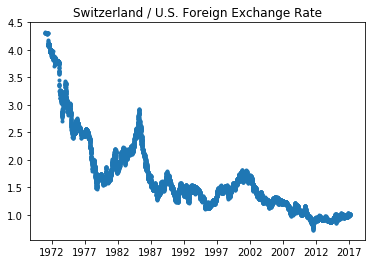

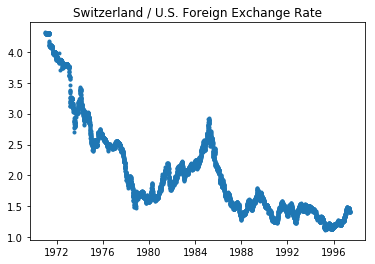

In [2]:
chf = FredSeries.get('DEXSZUS', db, create=True)
chf.plot()

fClock = _tr.FredClock.get('Main', db, create=True)

cutoffs = FredTimestamp(v=datetime.date(1997, 6, 1))

with Context({fClock.cutoffs: cutoffs}):
    chf.plot()

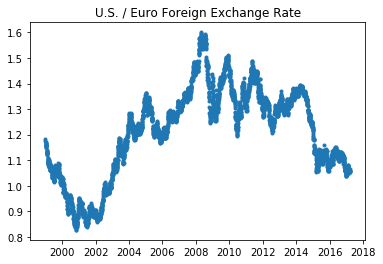

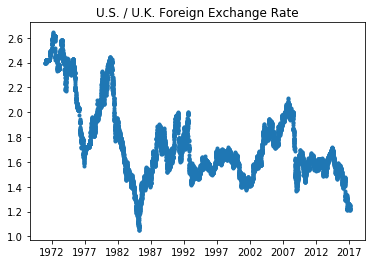

In [3]:
eur = FredSeries.get('DEXUSEU', db, create=True)
gbp = FredSeries.get('DEXUSUK', db, create=True)

eur.plot()
gbp.plot()

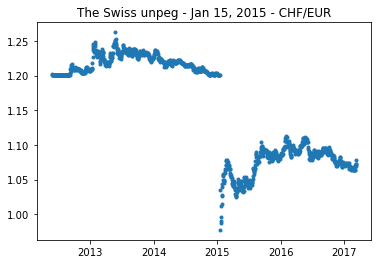

In [4]:
d1 = dict(chf.data())
d2 = dict(eur.data())

common = set(d1.keys()).intersection(d2.keys())
data = sorted( [ (d, d1[d]*d2[d]) for d in common ])
data = data[-1200:]

import matplotlib.pyplot as plt
days, obs = zip(*data)
plt.plot_date(x=days, y=obs, marker='.')
plt.title('The Swiss unpeg - Jan 15, 2015 - CHF/EUR')
plt.show()

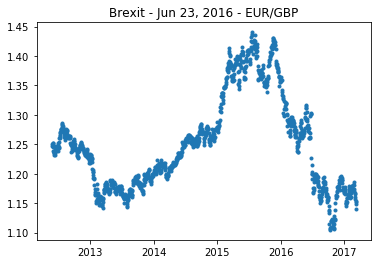

In [5]:
d1 = dict(eur.data()) # $/EUR
d2 = dict(gbp.data()) # $/GBP

common = set(d1.keys()).intersection(d2.keys())
data = sorted( [ (d, d2[d]/d1[d]) for d in common ])
data = data[-1200:]

import matplotlib.pyplot as plt
days, obs = zip(*data)
plt.plot_date(x=days, y=obs, marker='.')
plt.title('Brexit - Jun 23, 2016 - EUR/GBP')
plt.show()